In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from VQPCASuite.clustering import *
from VQPCASuite.preprocess import *

# Set times new roman as default
plt.rcParams['font.family'] = 'Times New Roman'

Index(['T', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'N2', 'AR',
       'HE'],
      dtype='object', name=0)


Text(0, 0.5, 'T [K]')

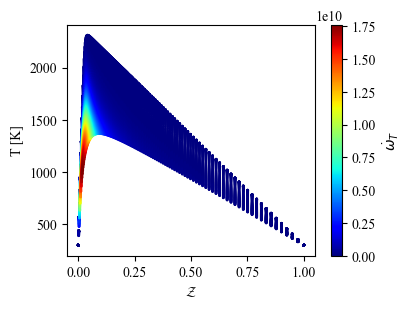

In [2]:
# Import flamalet data and plot mixture fraction vs temperature

# Load the hydrogen flamelet dataset
# Import the flamelet dataset
path_to_files = '/Users/matteosavarese/Desktop/Dottorato/Datasets/hydrogen-air-flamelet/'
filename = 'STEADY-clustered-flamelet-H2-'
# Import state space
state_space = pd.read_csv(path_to_files + filename + 'state-space.csv', header=None)
# Import state space sources
state_space_sources = pd.read_csv(path_to_files + filename + 'state-space-sources.csv', header=None)
# Import mixture fraction
mixture_fraction = pd.read_csv(path_to_files + filename + 'mixture-fraction.csv', header=None)
# Import heat release rate
heat_release_rate = pd.read_csv(path_to_files + filename + 'heat-release-rate.csv', header=None)
# Import dissipation rate 
dissipation_rates = pd.read_csv(path_to_files + filename + 'dissipation-rates.csv', header=None)
# Import state space names as a list of strings
state_space_names = pd.read_csv(path_to_files + filename + 'state-space-names.csv', header=None)
# Assign column names to the dataframes
state_space.columns = state_space_names.iloc[:,0]
state_space.head()
# Assign column names to the sources dataframe
state_space_sources.columns = state_space_names.iloc[:,0]

# Print column names
print(state_space.columns)

# ------------ Plot mixture fraction vs temperature colored by heat release rate ----------- #
fig, ax = plt.subplots(figsize=(4,3))
sc = ax.scatter(mixture_fraction, state_space.values[:,0], s=1, c=heat_release_rate.values, cmap='jet')
cb = fig.colorbar(sc, ax=ax)
cb.set_label('$\dot{\omega}_T$')
ax.set_xlabel('$\mathcal{Z}$')
ax.set_ylabel('T [K]')

In [3]:
# ------------ Data pre-processing ------------ #

# Select scaling method
method = 'auto'

# Initialize scaler
scaler = Scaler(method=method)

# Scale and center data
X_scaled = scaler.fit_transform(state_space.values)

Text(0, 0.5, 'T [K]')

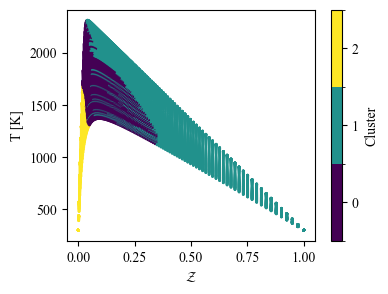

In [4]:
# ------------- Run VQPCA and plot the clusters ---------- #
model = vqpca(X_scaled, stopping_rule="n_eigs")

# Select number of clusters
nk = 3
# Fit the model
labels, model = model.fit(k=nk, q=2, verbose=False)

# Create discrete colormap
cmap = plt.cm.get_cmap('viridis')  # If you have Parula; if not, replace with 'viridis' or similar

# Create discrete colormap by selecting `n_clusters` colors from Parula
from matplotlib.colors import ListedColormap, BoundaryNorm
discrete_parula_cmap = ListedColormap(cmap(np.linspace(0, 1, nk)))

# Define boundaries and norm for discrete colormap
bounds = np.linspace(-0.5, nk - 0.5, nk + 1)
norm = BoundaryNorm(bounds, discrete_parula_cmap.N)

# Plot clustering results
fig, ax = plt.subplots(figsize=(4,3))
sc = ax.scatter(mixture_fraction, state_space.values[:,0], s=1, c=labels, cmap=discrete_parula_cmap, norm=norm)
cb = fig.colorbar(sc, ax=ax, ticks=np.arange(nk), boundaries=bounds)
cb.set_label('Cluster')
ax.set_xlabel('$\mathcal{Z}$')
ax.set_ylabel('T [K]')

Text(0, 0.5, '$PC_0$ weight')

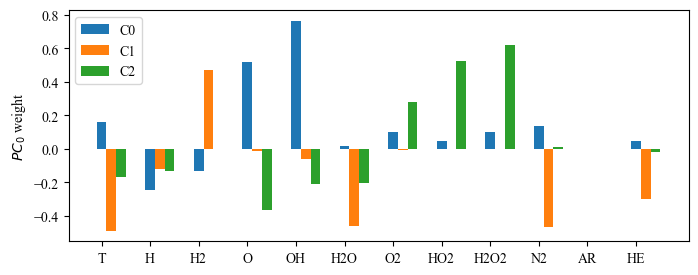

In [5]:
# -------------- Results interpretation ------------- #

# Extract the local PCA objects
comp = model.get_components()   # List of arrays

# Plot weights of first eigenvector in the clusters
fig, ax = plt.subplots(figsize=(8,3))
for i in range(nk):
    weights = comp[i][:,0]
    ax.bar(np.arange(1+0.2*i, len(weights)+1+0.2*i), weights, width=0.2, label='C'+str(i))

ax.legend(loc='upper left')
ax.set_xticks(np.arange(1, len(weights)+1))
ax.set_xticklabels(state_space.columns)
ax.set_ylabel('$PC_0$ weight')

